# Texas Licenses

I originally got this dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df = pd.read_csv ("licfile.csv")
df.head()

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
# df = pd.read_csv ("licfile.csv", names=['LICTYPE','LICNUMBER','BIZCOUNTY','BIZNAME','BIZLINE1','BIZLINE2','BIZCITYSTATE','BIZTELEPHONE','EXPIRATION','OWNER','MAILLINE1','MAILLINE2','MAILCITYSTATE','MAILCOUNTYCODE','MAILCOUNTY','MAILZIP','TELEPHONE','LICSUBTYPE','CEFLAG'])
# df.head()

In [4]:
#df.info()

# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [5]:
df = pd.read_csv ("licfile.csv", names=['LICTYPE','LICNUMBER','BIZCOUNTY','BIZNAME','BIZLINE1','BIZLINE2','BIZCITYSTATE','BIZTELEPHONE','EXPIRATION','OWNER','MAILLINE1','MAILLINE2','MAILCITYSTATE','MAILCOUNTYCODE','MAILCOUNTY','MAILZIP','TELEPHONE','LICSUBTYPE','CEFLAG'],
                  dtype={ 'LICNUMBER': str,'BIZTELEPHONE': str, 'EXPIRATION': str,'MAILCOUNTYCODE': str,'TELEPHONE': str})
df.head()

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,08102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,09262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,02252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597816 entries, 0 to 597815
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LICTYPE         590730 non-null  object 
 1   LICNUMBER       597816 non-null  object 
 2   BIZCOUNTY       568035 non-null  object 
 3   BIZNAME         597815 non-null  object 
 4   BIZLINE1        0 non-null       float64
 5   BIZLINE2        0 non-null       float64
 6   BIZCITYSTATE    0 non-null       float64
 7   BIZTELEPHONE    0 non-null       object 
 8   EXPIRATION      597816 non-null  object 
 9   OWNER           597805 non-null  object 
 10  MAILLINE1       541333 non-null  object 
 11  MAILLINE2       13863 non-null   object 
 12  MAILCITYSTATE   564578 non-null  object 
 13  MAILCOUNTYCODE  564869 non-null  object 
 14  MAILCOUNTY      592402 non-null  object 
 15  MAILZIP         597816 non-null  object 
 16  TELEPHONE       536224 non-null  object 
 17  LICSUBTYPE

In [7]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE       object
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

In [8]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,08102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,09262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,02252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

You can use list slicing with `.str` (we did `dt.per_name.str[:4]` for the home data stuff once), `pd.to_datetime`, or a hundred other methods.

In [9]:
df['EXPIRATION']= pd.to_datetime(df['EXPIRATION'], format='%m%d%Y')

Check the first five expirations to make sure they look right.

In [10]:
#df.dtypes
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N


# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [11]:
df['LICTYPE'].value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [12]:
df['LICTYPE'].value_counts().sort_values().head(10)

Legal Service Contract Admin                       1
Mobile Cosmetology Esthetician/Manicure Saloon     2
Cosmetology Wig Instructor                         2
Mobile Cosmetology Manicure Specialty Saloon       2
Licensed Court Interpreter CE Provider             2
Booting CE Provider                                3
Barber Hair Weaving Shop                           4
Barber Hair Braiding Shop                          4
Mobile Cosmetology Esthetician Specialty Saloon    5
Registered Accessibility Specialist CE Provider    8
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [13]:
# Yes I know I left this in here, it's a learning experience!
#df[df['LICTYPE'].str.contains("Electrician")]

## 8. How many of the rows of LICTYPE are NaN?

In [14]:
df['LICTYPE'].isna().value_counts()

False    590730
True       7086
Name: LICTYPE, dtype: int64

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [15]:
df['LICTYPE'] = df['LICTYPE'].fillna(False)

In [16]:
df['LICTYPE'].isna().value_counts()

False    597816
Name: LICTYPE, dtype: int64

In [17]:
df['LICTYPE'] = df['LICTYPE'].astype(str)

## 10. What's the most popular kind of electrician?

In [18]:
df['LICTYPE'][df['LICTYPE'].str.contains("Electrician")].value_counts()

Apprentice Electrician                110593
Journeyman Electrician                 38170
Master Electrician                     16810
Apprentice Sign Electrician             3994
Maintenance Electrician                 1184
Master Sign Electrician                  542
Journeyman Sign Electrician              391
Electrician CE Provider                  109
Electrician Apprenticeship Program        45
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

<AxesSubplot:>

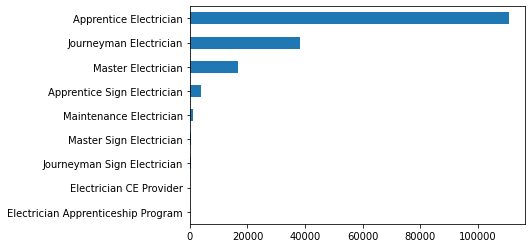

In [19]:
df['LICTYPE'][df['LICTYPE'].str.contains("Electrician")].value_counts().sort_values().plot(
    kind='barh')

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [20]:
df['LICTYPE'][(df['LICTYPE'].str.contains("Electrician")) & (df['LICTYPE'].str.contains("Sign"))].value_counts()

Apprentice Sign Electrician    3994
Master Sign Electrician         542
Journeyman Sign Electrician     391
Name: LICTYPE, dtype: int64

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [21]:
df.head(13)

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N
5,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,2017-05-04,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,0999,OUT OF STATE,73456,5802765961,NaN,N
6,Associate Auctioneer,15698,OUT OF STATE,"TUCKER, MONTE EARL",NaN,NaN,NaN,NaN,2017-06-16,"TUCKER, MONTE EARL",19139 HIGHWAY 6,NaN,SAYRE OK 73662-6080,0999,OUT OF STATE,73662,5802250269,NaN,N
7,Associate Auctioneer,15810,MILAM,"COOPER, THOMAS JAMES",NaN,NaN,NaN,NaN,2017-03-18,"COOPER, THOMAS JAMES",346 MAIN ST,NaN,ROSEBUD TX 76570,0145,FALLS,76570,2815078713,NaN,N
8,Associate Auctioneer,15835,OUT OF STATE,"BLANKENSHIP, KERRY NEIL",NaN,NaN,NaN,NaN,2017-05-04,"BLANKENSHIP, KERRY NEIL",10664 BELLEVILLE RD,NaN,RINGLING OK 73456-2014,0999,OUT OF STATE,73456,5802765961,NaN,N
9,Associate Auctioneer,16784,OUT OF STATE,"DAWES, NICHOLAS MORGAN",NaN,NaN,NaN,NaN,2017-10-19,"DAWES, NICHOLAS MORGAN",3500 MAPLE AVENUE 17TH FLOOR,NaN,DALLAS TX 75219,0113,DALLAS,75219,2144091137,NaN,N


In [22]:
df['OWNER'].str.extract(r"(\w*),", expand=False)

0         RISINGER
1         WILLIAMS
2          GUEVARA
3           BOWERS
4           DEMSKY
            ...   
597811        ABEL
597812        GRAY
597813       MAYER
597814     FRIESEN
597815       BAUER
Name: OWNER, Length: 597816, dtype: object

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [23]:
df['lastname'] = df['OWNER'].str.extract(r"(\w*),", expand=False)

In [24]:
#df.lastname.isna().value_counts()
#df[df.lastname.isna()]

# 15. What are the ten most popular last names?

In [25]:
df.lastname.value_counts().head(10)

NGUYEN       22321
TRAN          8161
GARCIA        5886
LE            5616
MARTINEZ      4936
RODRIGUEZ     4869
HERNANDEZ     4678
PHAM          4009
GONZALEZ      3844
              3508
Name: lastname, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [26]:
df['LICTYPE'][df.lastname =='NGUYEN'].value_counts().head()

Cosmetology Manicurist     12874
Cosmetology Operator        4048
Cosmetology Esthetician     2887
Cosmetologist               1878
Apprentice Electrician       195
Name: LICTYPE, dtype: int64

In [27]:
df['LICTYPE'][df.lastname =='TRAN'].value_counts().head()

Cosmetology Manicurist     4686
Cosmetology Operator       1481
Cosmetology Esthetician    1034
Cosmetologist               715
Apprentice Electrician       96
Name: LICTYPE, dtype: int64

In [28]:
df['LICTYPE'][df.lastname == 'LE'].value_counts().head()

Cosmetology Manicurist     3282
Cosmetology Operator        954
Cosmetology Esthetician     731
Cosmetologist               500
A/C Technician               43
Name: LICTYPE, dtype: int64

The background of this [is interesting](https://www.npr.org/2019/05/19/724452398/how-vietnamese-americans-took-over-the-nails-business-a-documentary) and [tragic](https://www.nytimes.com/2015/05/10/nyregion/at-nail-salons-in-nyc-manicurists-are-underpaid-and-unprotected.html).

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [29]:
df['LICTYPE'][df.lastname.isin(['NGUYEN','TRAN','LE'])].value_counts().head()

Cosmetology Manicurist     20842
Cosmetology Operator        6483
Cosmetology Esthetician     4652
Cosmetologist               3093
Apprentice Electrician       328
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ko`

The answer is not `.str.contains('ko')`, but it isn't necessarily too different.

* One way involves a `.str.` method that check if a string ends with something,
* the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before)

If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [30]:
df.lastname = df.lastname.fillna('None')
df.lastname.isna().value_counts()
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY


In [31]:
df[df['lastname'].str.match(r".*KO$")]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname
6007,A/C Technician,20195,BOWIE,"KOKKO, ROBERT J",NaN,NaN,NaN,NaN,2017-05-04,"KOKKO, ROBERT J",NaN,NaN,NaN,NaN,BOWIE,75569,NaN,REG,N,KOKKO
6069,A/C Technician,20410,DALLAS,"TSALKO, ALEXANDRE",NaN,NaN,NaN,NaN,2017-04-27,"TSALKO, ALEXANDRE",NaN,NaN,NaN,NaN,DALLAS,75089,NaN,REG,N,TSALKO
8187,A/C Technician,29043,HARRIS,"ELASKO, JOHN P",NaN,NaN,NaN,NaN,2017-09-21,"ELASKO, JOHN P",NaN,NaN,NaN,NaN,HARRIS,77336,NaN,REG,N,ELASKO
9865,A/C Technician,37165,TRAVIS,"PIEKIELKO, JOSEPH E",NaN,NaN,NaN,NaN,2017-04-05,"PIEKIELKO, JOSEPH E",NaN,NaN,NaN,NaN,TRAVIS,78617,NaN,REG,N,PIEKIELKO
12275,A/C Technician,47111,TRAVIS,"METKO, JOSEPH C",NaN,NaN,NaN,NaN,2017-09-28,"METKO, JOSEPH C",NaN,NaN,NaN,NaN,TRAVIS,78725,NaN,REG,N,METKO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580675,Tow Truck Operator (Incident Management),36058,MCLENNAN,"LUCKO, DYLAN L",NaN,NaN,NaN,NaN,2016-09-04,"LUCKO, DYLAN L",NaN,NaN,WACO,0309,MCLENNAN,76705,NaN,IM,N,LUCKO
582866,Tow Truck Operator (Incident Management),38909,DALLAS,"ARKO, BRANDON T",NaN,NaN,NaN,NaN,2017-05-16,"ARKO, BRANDON T",NaN,NaN,PLANO,0085,COLLIN,75075,NaN,IM,N,ARKO
588181,Property Tax Appraiser,74632,NaN,"DZURKO, LINDA STARR",NaN,NaN,NaN,NaN,2017-11-07,"DZURKO, LINDA STARR",5801 TROWBRIDGE DR,NaN,EL PASO TX 79925,0141,EL PASO,79925,9157802000,APPRAISER,N,DZURKO
591562,Used Auto Parts Recycler Employee,4857,DALLAS,"SHEYKO, MIKHAIL S",NaN,NaN,NaN,NaN,2017-07-23,"SHEYKO, MIKHAIL S",14750 STATE HWY 205,NaN,TERRELL TX 75160,0257,KAUFMAN,75160,NaN,EMPLOYEE,N,SHEYKO


In [32]:
df['LICTYPE'][df['lastname'].str.match(r".*KO$")].value_counts().head(1)

Cosmetology Operator    67
Name: LICTYPE, dtype: int64

In [33]:
#df['LICTYPE'][df.lastname.(r".*ko$")]

## 20. Get that as a percentage

In [34]:
df['LICTYPE'][df['lastname'].str.match(r".*KO$")].value_counts(normalize=True).head(1)*100

Cosmetology Operator    37.222222
Name: LICTYPE, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [35]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [36]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [37]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [38]:
df['OWNER'].head(12)

0         RISINGER, JIM MARVIN
1          WILLIAMS, JON ANDRE
2        GUEVARA, JUAN ANTONIO
3     BOWERS, JAMES BRISCOE II
4          DEMSKY, JOHN EDWARD
5            THOMPSON, RANDY D
6           TUCKER, MONTE EARL
7         COOPER, THOMAS JAMES
8      BLANKENSHIP, KERRY NEIL
9       DAWES, NICHOLAS MORGAN
10        LESTER, TIMMY EUGENE
11         MANCILL, MARK DUANE
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [39]:
#df['OWNER'].str.extract(r",\s?([\w\W\s]*)$").head(10)
df['OWNER'].str.extract(r",\s?(\w*)[\W\w]*$").head(10)

,0
0,JIM
1,JON
2,JUAN
3,JAMES
4,JOHN
5,RANDY
6,MONTE
7,THOMAS
8,KERRY
9,NICHOLAS


## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [40]:
df['FIRSTNAME'] = df['OWNER'].str.extract(r",\s?(\w*)[\W\w]*$")
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname,FIRSTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN


# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [41]:
df.FIRSTNAME.isna().value_counts()

False    516215
True      81601
Name: FIRSTNAME, dtype: int64

What do their names look like?

In [42]:
df[df.FIRSTNAME.isna()]

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname,FIRSTNAME
28022,Appliance Installation Contractor,101,HARRIS,APPLIANCE INSTALLATION BY SPECIAL D LLC,NaN,NaN,NaN,NaN,2017-05-23,APPLIANCE INSTALLATION BY SPECIAL D LLC,...,NaN,HOUSTON TX 77093,0201,HARRIS,77093,2815363711,RAIC,N,None,NaN
28023,Appliance Installation Contractor,103,DALLAS,CAPITAL DISTRIBUTING INC,NaN,NaN,NaN,NaN,2017-04-08,CAPITAL DISTRIBUTING INC,...,NaN,DALLAS TX 75247-6103,0113,DALLAS,75247,2146382681,RAIC,N,None,NaN
28024,Appliance Installation Contractor,104,DALLAS,INSTALLCO LLC,NaN,NaN,NaN,NaN,2017-04-08,INSTALLCO LLC,...,NaN,DALLAS TX 75247-6103,0113,DALLAS,75247,2142761033,RAIC,N,None,NaN
28025,Appliance Installation Contractor,107,BOWIE,LAFFERTYS TV & APPLIANCE INC,NaN,NaN,NaN,NaN,2018-03-20,LAFFERTYS TV & APPLIANCE INC,...,NaN,TEXARKANA TX 75503,0037,BOWIE,75503,9037942581,RAIC,N,None,NaN
28026,Appliance Installation Contractor,108,FREESTONE,BALLARD COMPANY,NaN,NaN,NaN,NaN,2017-04-02,BALLARD COMPANY,...,NaN,FAIRFIELD TX 75840,0161,FREESTONE,75840,9033895774,RAIC,N,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590395,Used Auto Parts Recycler,1513,BEXAR,R & D PARTS INC.,NaN,NaN,NaN,NaN,2018-02-16,R & D PARTS INC.,...,NaN,SAN ANTONIO TX 78211,0029,BEXAR,78211,2106232000,RECYCLER,N,None,NaN
590397,Used Auto Parts Recycler,1514,DALLAS,DFW AUTO & PARTS SALES,NaN,NaN,NaN,NaN,2018-02-24,DFW AUTO & PARTS SALES,...,NaN,HALTOM CITY TX 76117,0439,TARRANT,76117,8174399281,RECYCLER,N,None,NaN
590399,Used Auto Parts Recycler,1515,HARRIS,T&D BRADLEY AUTO SERVICE LLC,NaN,NaN,NaN,NaN,2018-02-24,T&D BRADLEY AUTO SERVICE LLC,...,NaN,HOUSTON TX 77022-6106,0201,HARRIS,77022,8322096210,RECYCLER,N,None,NaN
590400,Used Auto Parts Recycler,1516,DALLAS,A & M AUTO PARTS,NaN,NaN,NaN,NaN,2018-02-28,A & M AUTO PARTS,...,NaN,DALLAS TX 75216-4138,0113,DALLAS,75216,2143711500,RECYCLER,N,None,NaN


## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [43]:
#I'm confused... It seems most of the missing first names are because the owner's name is listed as a company. 
# Should the regex change to include them?? 

In [44]:
#These are some common problems/still-dirty things I noticed in the data. There could be more I am not sure how to remove them

In [45]:
df[df.FIRSTNAME == 'INC']

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname,FIRSTNAME
28021,Appliance Installation Contractor,100,TRAVIS,"OBY'S APPLIANCE INSTALLATION, INC",NaN,NaN,NaN,NaN,2018-02-28,"OBY'S APPLIANCE INSTALLATION, INC",...,NaN,AUSTIN TX 78757,0453,TRAVIS,78757,5124540550,RAIC,N,INSTALLATION,INC
28029,Appliance Installation Contractor,113,OUT OF STATE,"HOME DEPOT USA, INC",NaN,NaN,NaN,NaN,2018-04-11,"HOME DEPOT USA, INC",...,C11 HOME SVCS COMPLIANCE,ATLANTA GA 30339,0999,OUT OF STATE,30339,9728720128,RAIC,N,USA,INC
28056,Appliance Installation Contractor,171,OUT OF STATE,"J.B. HUNT TRANSPORT, INC.",NaN,NaN,NaN,NaN,2017-06-24,"J.B. HUNT TRANSPORT, INC.",...,NaN,LOWELL AR 72745-0598,0999,OUT OF STATE,72745,4794193157,RAIC,N,TRANSPORT,INC
28057,Appliance Installation Contractor,174,HARRIS,"DUPAR, INC",NaN,NaN,NaN,NaN,2017-06-29,"DUPAR, INC",...,NaN,HOUSTON TX 77064,0201,HARRIS,77064,2815172300,RAIC,N,DUPAR,INC
28066,Appliance Installation Contractor,192,NUECES,"RAY WEST WAREHOUSES, INC",NaN,NaN,NaN,NaN,2017-08-27,"RAY WEST WAREHOUSES, INC",...,NaN,CORPUS CHRISTI TX 78408-2744,0355,NUECES,78408,3618845595,RAIC,N,WAREHOUSES,INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590169,Used Auto Parts Recycler,1336,HARRIS,"ESTRELLA USED PARTS #5, INC.",NaN,NaN,NaN,NaN,2018-01-20,"ESTRELLA USED PARTS #5, INC.",...,NaN,HUNTSVILLE TX 77320,0471,WALKER,77320,9362940399,RECYCLER,N,5,INC
590186,Used Auto Parts Recycler,1357,HAYS,"CHMEIS, INC.",NaN,NaN,NaN,NaN,2017-05-18,"CHMEIS, INC.",...,NaN,KYLE TX 78640,0209,HAYS,78640,5122950086,RECYCLER,N,CHMEIS,INC
590235,Used Auto Parts Recycler,1401,CAMERON,"ROLANDO GARZA MOTORS, INC.",NaN,NaN,NaN,NaN,2016-12-02,"ROLANDO GARZA MOTORS, INC.",...,NaN,BROWNSVILLE TX 78521,0061,CAMERON,78521,9565044040,RECYCLER,N,MOTORS,INC
590254,Used Auto Parts Recycler,1418,GRAYSON,"ELLIS TRUCK & AUTO, INC.",NaN,NaN,NaN,NaN,2017-02-18,"ELLIS TRUCK & AUTO, INC.",...,NaN,SHERMAN TX 75092,0181,GRAYSON,75092,9038931127,RECYCLER,N,AUTO,INC


In [46]:
df[df.FIRSTNAME == 'LLC']

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname,FIRSTNAME
28061,Appliance Installation Contractor,182,TRAVIS,"LONGHORN DELIVERY SERVICE, LLC",NaN,NaN,NaN,NaN,2016-02-03,"LONGHORN DELIVERY SERVICE, LLC",...,NaN,AUSTIN TX 78748,0453,TRAVIS,78748,5122030906,RAIC,N,SERVICE,LLC
28128,Appliance Installation Contractor,273,DALLAS,"TEXAN BLUE POOL SERVICE, LLC",NaN,NaN,NaN,NaN,2017-07-13,"TEXAN BLUE POOL SERVICE, LLC",...,NaN,FARMERS BRANCH TX 75229,0113,DALLAS,75229,8179857665,RAIC,N,SERVICE,LLC
28290,Appliance Installation Contractor,472,TARRANT,"CONNOR POOL SERVICE, LLC",NaN,NaN,NaN,NaN,2017-04-26,"CONNOR POOL SERVICE, LLC",...,NaN,FORT WORTH TX 76115-3143,0439,TARRANT,76115,8176142546,RAIC,N,SERVICE,LLC
28337,Appliance Installation Contractor,531,PARKER,"ECO-SMART POOLS, LLC",NaN,NaN,NaN,NaN,2018-02-08,"ECO-SMART POOLS, LLC",...,NaN,ALEDO TX 76008-3061,0367,PARKER,76008,8173190654,RAIC,N,POOLS,LLC
28373,Appliance Installation Contractor,578,BRAZOS,"THE POOL GUY ENTERPRISES, LLC",NaN,NaN,NaN,NaN,2018-04-16,"THE POOL GUY ENTERPRISES, LLC",...,NaN,COLLEGE STATION TX 77845,0041,BRAZOS,77845,9795756200,RAIC,N,ENTERPRISES,LLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590263,Used Auto Parts Recycler,1424,DALLAS,"US TRUCK PARTS AND SALES, LLC",NaN,NaN,NaN,NaN,2018-03-14,"US TRUCK PARTS AND SALES, LLC",...,NaN,DALLAS TX 75253,0113,DALLAS,75253,9725577979,RECYCLER,N,SALES,LLC
590270,Used Auto Parts Recycler,1429,DALLAS,"TX ORIGINAL CAR AUDIO, LLC",NaN,NaN,NaN,NaN,2017-03-23,"TX ORIGINAL CAR AUDIO, LLC",...,NaN,RICHARDSON TX 75081,0113,DALLAS,75081,2145755635,RECYCLER,N,AUDIO,LLC
590304,Used Auto Parts Recycler,1452,HARRIS,"MAX TRUCK & EQUIPMENT, LLC",NaN,NaN,NaN,NaN,2017-07-13,"MAX TRUCK & EQUIPMENT, LLC",...,NaN,HOUSTON TX 77028,0201,HARRIS,77028,7136353433,RECYCLER,N,EQUIPMENT,LLC
590321,Used Auto Parts Recycler,1463,CAMERON,"RANCHO AUTOPLEX,LLC",NaN,NaN,NaN,NaN,2017-08-15,"RANCHO AUTOPLEX,LLC",...,NaN,BROWNSVILLE TX 78520,0061,CAMERON,78520,9562804457,RECYCLER,N,AUTOPLEX,LLC


How many empty first names do we have now?

In [47]:
df[df.lastname == 'None']

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname,FIRSTNAME
28022,Appliance Installation Contractor,101,HARRIS,APPLIANCE INSTALLATION BY SPECIAL D LLC,NaN,NaN,NaN,NaN,2017-05-23,APPLIANCE INSTALLATION BY SPECIAL D LLC,...,NaN,HOUSTON TX 77093,0201,HARRIS,77093,2815363711,RAIC,N,None,NaN
28023,Appliance Installation Contractor,103,DALLAS,CAPITAL DISTRIBUTING INC,NaN,NaN,NaN,NaN,2017-04-08,CAPITAL DISTRIBUTING INC,...,NaN,DALLAS TX 75247-6103,0113,DALLAS,75247,2146382681,RAIC,N,None,NaN
28024,Appliance Installation Contractor,104,DALLAS,INSTALLCO LLC,NaN,NaN,NaN,NaN,2017-04-08,INSTALLCO LLC,...,NaN,DALLAS TX 75247-6103,0113,DALLAS,75247,2142761033,RAIC,N,None,NaN
28025,Appliance Installation Contractor,107,BOWIE,LAFFERTYS TV & APPLIANCE INC,NaN,NaN,NaN,NaN,2018-03-20,LAFFERTYS TV & APPLIANCE INC,...,NaN,TEXARKANA TX 75503,0037,BOWIE,75503,9037942581,RAIC,N,None,NaN
28026,Appliance Installation Contractor,108,FREESTONE,BALLARD COMPANY,NaN,NaN,NaN,NaN,2017-04-02,BALLARD COMPANY,...,NaN,FAIRFIELD TX 75840,0161,FREESTONE,75840,9033895774,RAIC,N,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590395,Used Auto Parts Recycler,1513,BEXAR,R & D PARTS INC.,NaN,NaN,NaN,NaN,2018-02-16,R & D PARTS INC.,...,NaN,SAN ANTONIO TX 78211,0029,BEXAR,78211,2106232000,RECYCLER,N,None,NaN
590397,Used Auto Parts Recycler,1514,DALLAS,DFW AUTO & PARTS SALES,NaN,NaN,NaN,NaN,2018-02-24,DFW AUTO & PARTS SALES,...,NaN,HALTOM CITY TX 76117,0439,TARRANT,76117,8174399281,RECYCLER,N,None,NaN
590399,Used Auto Parts Recycler,1515,HARRIS,T&D BRADLEY AUTO SERVICE LLC,NaN,NaN,NaN,NaN,2018-02-24,T&D BRADLEY AUTO SERVICE LLC,...,NaN,HOUSTON TX 77022-6106,0201,HARRIS,77022,8322096210,RECYCLER,N,None,NaN
590400,Used Auto Parts Recycler,1516,DALLAS,A & M AUTO PARTS,NaN,NaN,NaN,NaN,2018-02-28,A & M AUTO PARTS,...,NaN,DALLAS TX 75216-4138,0113,DALLAS,75216,2143711500,RECYCLER,N,None,NaN


In [48]:
df[df.FIRSTNAME == 'CO']

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname,FIRSTNAME
13211,A/C Technician,50554,HARRIS,"LAO, CO KIEN",NaN,NaN,NaN,NaN,2018-01-02,"LAO, CO KIEN",...,NaN,NaN,NaN,HARRIS,77083,NaN,CER,N,LAO,CO
235113,Cosmetology Manicurist,1101678,NUECES,"VU, CO THI",NaN,NaN,NaN,NaN,2018-03-31,"VU, CO THI",...,NaN,CORPUS CHRISTI TX 78413-5163,0355,NUECES,78413,3619397371,MA,Y,VU,CO
238814,Cosmetology Manicurist,1121040,TARRANT,"TRAN, CO THI",NaN,NaN,NaN,NaN,2019-03-09,"TRAN, CO THI",...,NaN,ARLINGTON TX 76014-3431,0439,TARRANT,76014,8179913096,MA,N,TRAN,CO
242925,Cosmetology Manicurist,1141587,DALLAS,"NGUYEN, CO HONG THI",NaN,NaN,NaN,NaN,2018-12-05,"NGUYEN, CO HONG THI",...,NaN,GARLAND TX 75040-2701,0113,DALLAS,75040,9724159108,MA,N,NGUYEN,CO
273469,Cosmetology Esthetician,1254796,HARRIS,"TRAN, CO THI TRIEU",NaN,NaN,NaN,NaN,2017-07-31,"TRAN, CO THI TRIEU",...,NaN,HOUSTON TX 77064-5194,0201,HARRIS,77064,7138849922,FA,N,TRAN,CO
276857,Cosmetology Manicurist,1265358,HARRIS,"TRAN, CO THI TRIEU",NaN,NaN,NaN,NaN,2017-07-31,"TRAN, CO THI TRIEU",...,NaN,HOUSTON TX 77064-5194,0201,HARRIS,77064,7138849922,MA,N,TRAN,CO
291329,Cosmetology Manicurist,1312050,DALLAS,"HUYNH, CO TAN",NaN,NaN,NaN,NaN,2019-01-26,"HUYNH, CO TAN",...,NaN,CARROLLTON TX 75006-3169,0113,DALLAS,75006,4699518563,MA,N,HUYNH,CO
300907,Cosmetology Esthetician,1342140,DALLAS,"NGUYEN, CO HONG THI",NaN,NaN,NaN,NaN,2017-01-13,"NGUYEN, CO HONG THI",...,NaN,GARLAND TX 75040-2701,0113,DALLAS,75040,9724159108,FA,N,NGUYEN,CO
317615,Cosmetology Manicurist,1439427,HARRIS,"TRAN, CO",NaN,NaN,NaN,NaN,2018-08-07,"TRAN, CO",...,NaN,HOUSTON TX 77036-3525,0201,HARRIS,77036,8322311038,MA,N,TRAN,CO
340165,Cosmetology Manicurist,1498640,DALLAS,"NGUYEN, CO THI",NaN,NaN,NaN,NaN,2018-05-19,"NGUYEN, CO THI",...,NaN,GRAND PRAIRIE TX 75052-0736,0113,DALLAS,75052,9729745569,MA,N,NGUYEN,CO


In [49]:
df.FIRSTNAME = df.FIRSTNAME.fillna('None')
#For some reason dropna was not working properly -- 
#also there were 82,000 values without a first name so I didn't know if that was too many to drop


In [50]:
df.FIRSTNAME.isna().value_counts()

False    597816
Name: FIRSTNAME, dtype: int64

In [51]:
#df[df.lastname.str.contains('&')]

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [52]:
df.FIRSTNAME.value_counts().head(10)
#Noticing "Inc" and "LLC" here so maybe I need to revisit the regex!

None           81601
JOSE            7762
MICHAEL         5885
DAVID           5379
MARIA           5282
JAMES           4946
JUAN            4569
ROBERT          4389
JOHN            4364
CHRISTOPHER     3138
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` or `na=False` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [53]:
df.FIRSTNAME[df['LICTYPE'].isin(['Cosmetology Operator', 'Cosmetology Esthetician', 'Cosmetologist'])].value_counts()

MARIA       4494
JENNIFER    1683
JESSICA     1525
ASHLEY      1269
MARY        1204
            ... 
MARQUISA       1
EMELITA        1
SEMMERIA       1
RAYMIE         1
KAMIESHA       1
Name: FIRSTNAME, Length: 21003, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [54]:
df.FIRSTNAME[df['LICTYPE'].str.contains('Electric')].value_counts()

None         10046
JOSE          5720
MICHAEL       3547
JUAN          3335
DAVID         3315
             ...  
KENDALE          1
REGINOLD         1
AARESH           1
JERIMEY          1
ENRIQUETA        1
Name: FIRSTNAME, Length: 11871, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

A terrible thing that data analysts are often guilty of is using names to make assumptions about people. Beyond stereotypes involving last names, first names are often used to predict someone's race, ethnic background, or gender.

And if that isn't bad enough: if we were looking for Python libraries to do this sort of analysis, we'd come across [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again.

How'd it happen? [On Github, in a pull request!](https://github.com/bmuller/gender_detector/pull/14) Neat, right?

But yeah: apparently Python didn't get the message.

The sexmachine package doesn't work on Python 3 because it's from 300 BC, so we're going to use a Python 3 fork with the less problematic name [gender guesser](https://pypi.python.org/pypi/gender-guesser/).

#### Use `pip` or `pip3` to install gender-guesser.

In [55]:
!pip install gender-guesser

You should consider upgrading via the 'pip install --upgrade pip' command.


#### Run this code to test to see that it works

In [56]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [57]:
detector.get_gender('Jose')

'male'

In [58]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [59]:
df.FIRSTNAME.head()

0      JIM
1      JON
2     JUAN
3    JAMES
4     JOHN
Name: FIRSTNAME, dtype: object

In [60]:
#df.dtypes

In [61]:
#df.FIRSTNAME.apply(lambda name: detector.get_gender(name)).head()
df.FIRSTNAME.apply(lambda name: detector.get_gender(name))

0         male
1         male
2         male
3         male
4         male
          ... 
597811    male
597812    male
597813    male
597814    male
597815    male
Name: FIRSTNAME, Length: 597816, dtype: object

In [62]:
df.FIRSTNAME.isna().value_counts()

False    597816
Name: FIRSTNAME, dtype: int64

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [63]:
df.FIRSTNAME.apply(lambda name: detector.get_gender(name)).value_counts()

male             229151
female           148304
unknown          130335
mostly_female     42370
mostly_male       26619
andy              21037
Name: FIRSTNAME, dtype: int64

In [64]:
df['GENDER'] = df.FIRSTNAME.apply(lambda name: detector.get_gender(name))

In [65]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname,FIRSTNAME,GENDER
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",...,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER,JIM,male
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",...,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS,JON,male
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",...,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA,JUAN,male
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",...,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS,JAMES,male
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",...,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY,JOHN,male


## 30. We like our data to be in tidy binary categories

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [66]:
import numpy as np

In [67]:
df.GENDER = df.GENDER.replace('mostly_female', 'female')
#df[df.GENDER == 'mostly_female']

In [68]:
df.GENDER = df.GENDER.replace('mostly_male', 'male')
#df[df.GENDER == 'mostly_male']

In [69]:
df.GENDER = df.GENDER.replace('andy', np.nan)
df.GENDER = df.GENDER.replace('unknown', np.nan)
#df[df.GENDER == 'andy']

## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [70]:
df.GENDER.value_counts(dropna=False)

male      255770
female    190674
NaN       151372
Name: GENDER, dtype: int64

In [71]:
df.GENDER.value_counts(dropna=False, normalize=True)*100

male      42.784067
female    31.895098
NaN       25.320835
Name: GENDER, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [72]:
df.FIRSTNAME[df.GENDER.isna()].value_counts().head(10)

None     81601
THANH     1555
TRANG     1144
INC       1077
HONG      1027
DUNG       988
LINH       910
LAN        808
LLC        732
YEN        625
Name: FIRSTNAME, dtype: int64

## 33. Manually check a few, too 

Using [a list of "gender-neutral baby names"](https://www.popsugar.com/family/Gender-Neutral-Baby-Names-34485564), pick a few names and check what results the library gives you.

In [73]:
#Flynn, Dakota, Alex
df.GENDER[df.FIRSTNAME.isin(['ALEX', 'FLYNN','DAKOTA', 'CODY'])].value_counts()

male    1265
Name: GENDER, dtype: int64

## 34. What are the most popular licenses for men? For women?

In [74]:
df.LICTYPE[df.GENDER == 'male'].value_counts().head(10)

Apprentice Electrician                      95682
Journeyman Electrician                      35512
A/C Technician                              24716
Master Electrician                          15770
Cosmetology Operator                        13591
Cosmetology Manicurist                      10710
Barber, Class A                              9779
Tow Truck Operator (Incident Management)     6852
Tow Truck Operator (Consent Tow)             5781
Legal Service Contract Sales Rep             5667
Name: LICTYPE, dtype: int64

In [75]:
df.LICTYPE[df.GENDER == 'female'].value_counts().head(10)

Cosmetology Operator                114921
Cosmetology Manicurist               24788
Cosmetology Esthetician              17151
Apprentice Electrician                4791
Cosmetologist                         4613
Legal Service Contract Sales Rep      4445
Cosmetology Operator Instructor       4404
Barber, Class A                       4100
VSF Employee                          1761
False                                 1501
Name: LICTYPE, dtype: int64

## 35. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values, or `.na=False` with `.str.contains`.

In [76]:
df.GENDER[df.LICTYPE == 'Property Tax Appraiser'].value_counts()

male      1457
female    1178
Name: GENDER, dtype: int64

In [77]:
df.GENDER[df.LICTYPE.str.contains('Tow Truck')].value_counts()

male      12983
female      641
Name: GENDER, dtype: int64

(By the way, what are those tow truck jobs?)

In [78]:
df.LICTYPE[df.LICTYPE.str.contains('Tow Truck')].value_counts()

Tow Truck Operator (Incident Management)    7804
Tow Truck Operator (Consent Tow)            6703
Tow Truck Operator (Private Property)        352
Tow Truck Operator Trainee                    53
Name: LICTYPE, dtype: int64

## 33. Graph them!

And let's **give them titles** so we know which is which.

<AxesSubplot:>

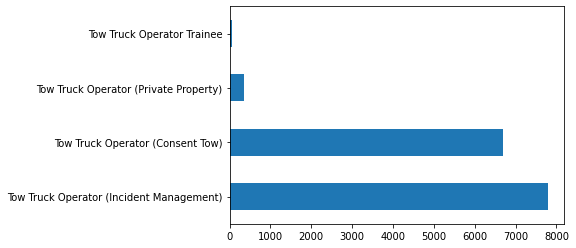

In [79]:
df.LICTYPE[df.LICTYPE.str.contains('Tow Truck')].value_counts().plot(kind='barh')

## 34. Calcuate the supposed gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [80]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    95682
Journeyman Electrician    35512
A/C Technician            24716
Master Electrician        15770
Cosmetology Operator      13591
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [81]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

,LICTYPE,LICTYPE,LICTYPE
Apprentice Electrician,95682.0,4791.0,10120.0
Journeyman Electrician,35512.0,1025.0,1633.0
A/C Technician,24716.0,880.0,2363.0
Master Electrician,15770.0,393.0,647.0
Cosmetology Operator,13591.0,114921.0,22694.0


In [82]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,Apprentice Electrician,95682.0,4791.0,10120.0
1,Journeyman Electrician,35512.0,1025.0,1633.0
2,A/C Technician,24716.0,880.0,2363.0
3,Master Electrician,15770.0,393.0,647.0
4,Cosmetology Operator,13591.0,114921.0,22694.0


In [83]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,Apprentice Electrician,95682.0,4791.0,10120.0
1,Journeyman Electrician,35512.0,1025.0,1633.0
2,A/C Technician,24716.0,880.0,2363.0
3,Master Electrician,15770.0,393.0,647.0
4,Cosmetology Operator,13591.0,114921.0,22694.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [84]:
gender_df['total_licenses'] = gender_df.male + gender_df.female + gender_df.unknown
gender_df.head()

,license,male,female,unknown,total_licenses
0,Apprentice Electrician,95682.0,4791.0,10120.0,110593.0
1,Journeyman Electrician,35512.0,1025.0,1633.0,38170.0
2,A/C Technician,24716.0,880.0,2363.0,27959.0
3,Master Electrician,15770.0,393.0,647.0,16810.0
4,Cosmetology Operator,13591.0,114921.0,22694.0,151206.0


In [85]:
gender_df['pct_known'] = ((gender_df.male + gender_df.female) / gender_df.total_licenses) * 100
gender_df.head()

,license,male,female,unknown,total_licenses,pct_known
0,Apprentice Electrician,95682.0,4791.0,10120.0,110593.0,90.849330
1,Journeyman Electrician,35512.0,1025.0,1633.0,38170.0,95.721771
2,A/C Technician,24716.0,880.0,2363.0,27959.0,91.548339
3,Master Electrician,15770.0,393.0,647.0,16810.0,96.151101
4,Cosmetology Operator,13591.0,114921.0,22694.0,151206.0,84.991336


In [86]:
gender_df['pct_male_known'] = (gender_df.male / (gender_df.male + gender_df.female)) * 100
gender_df.head()

,license,male,female,unknown,total_licenses,pct_known,pct_male_known
0,Apprentice Electrician,95682.0,4791.0,10120.0,110593.0,90.849330,95.231555
1,Journeyman Electrician,35512.0,1025.0,1633.0,38170.0,95.721771,97.194625
2,A/C Technician,24716.0,880.0,2363.0,27959.0,91.548339,96.561963
3,Master Electrician,15770.0,393.0,647.0,16810.0,96.151101,97.568521
4,Cosmetology Operator,13591.0,114921.0,22694.0,151206.0,84.991336,10.575666


In [87]:
gender_df['pct_female_known'] = (gender_df.female / (gender_df.male + gender_df.female)) * 100
gender_df.head()

,license,male,female,unknown,total_licenses,pct_known,pct_male_known,pct_female_known
0,Apprentice Electrician,95682.0,4791.0,10120.0,110593.0,90.849330,95.231555,4.768445
1,Journeyman Electrician,35512.0,1025.0,1633.0,38170.0,95.721771,97.194625,2.805375
2,A/C Technician,24716.0,880.0,2363.0,27959.0,91.548339,96.561963,3.438037
3,Master Electrician,15770.0,393.0,647.0,16810.0,96.151101,97.568521,2.431479
4,Cosmetology Operator,13591.0,114921.0,22694.0,151206.0,84.991336,10.575666,89.424334


## 35. What 10 licenses with more than 2,000 people and over 75% "known" gender has the most male owners? The most female?

In [88]:
gender_df[(gender_df.total_licenses > 2000) & (gender_df.pct_known > 75)].sort_values(by='male', ascending=False).head(10)

,license,male,female,unknown,total_licenses,pct_known,pct_male_known,pct_female_known
0,Apprentice Electrician,95682.0,4791.0,10120.0,110593.0,90.849330,95.231555,4.768445
1,Journeyman Electrician,35512.0,1025.0,1633.0,38170.0,95.721771,97.194625,2.805375
2,A/C Technician,24716.0,880.0,2363.0,27959.0,91.548339,96.561963,3.438037
3,Master Electrician,15770.0,393.0,647.0,16810.0,96.151101,97.568521,2.431479
4,Cosmetology Operator,13591.0,114921.0,22694.0,151206.0,84.991336,10.575666,89.424334
6,"Barber, Class A",9779.0,4100.0,2140.0,16019.0,86.640864,70.458967,29.541033
7,Tow Truck Operator (Incident Management),6852.0,344.0,608.0,7804.0,92.209124,95.219566,4.780434
8,Tow Truck Operator (Consent Tow),5781.0,276.0,646.0,6703.0,90.362524,95.443289,4.556711
9,Legal Service Contract Sales Rep,5667.0,4445.0,1324.0,11436.0,88.422525,56.042326,43.957674
10,False,4899.0,1501.0,686.0,7086.0,90.318939,76.546875,23.453125


In [89]:
gender_df[(gender_df.total_licenses > 2000) & (gender_df.pct_known > 75)].sort_values(by='female', ascending=False).head(10)

,license,male,female,unknown,total_licenses,pct_known,pct_male_known,pct_female_known
4,Cosmetology Operator,13591.0,114921.0,22694.0,151206.0,84.991336,10.575666,89.424334
17,Cosmetology Esthetician,1597.0,17151.0,4865.0,23613.0,79.396942,8.518242,91.481758
0,Apprentice Electrician,95682.0,4791.0,10120.0,110593.0,90.849330,95.231555,4.768445
9,Legal Service Contract Sales Rep,5667.0,4445.0,1324.0,11436.0,88.422525,56.042326,43.957674
24,Cosmetology Operator Instructor,553.0,4404.0,788.0,5745.0,86.283725,11.155941,88.844059
6,"Barber, Class A",9779.0,4100.0,2140.0,16019.0,86.640864,70.458967,29.541033
20,VSF Employee,1434.0,1761.0,295.0,3490.0,91.547278,44.882629,55.117371
10,False,4899.0,1501.0,686.0,7086.0,90.318939,76.546875,23.453125
19,Property Tax Appraiser,1457.0,1178.0,211.0,2846.0,92.586086,55.294118,44.705882
1,Journeyman Electrician,35512.0,1025.0,1633.0,38170.0,95.721771,97.194625,2.805375


## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

In [90]:
#gender_df.license[(gender_df.pct_male_known > gender_df.pct_female_known) | (gender_df.pct_female_known > gender_df.pct_male_known)].head(10)

gender_df['LICTYPE'] = gender_df.license[(gender_df.pct_male_known > gender_df.pct_female_known) | (gender_df.pct_female_known > gender_df.pct_male_known)]
gender_df

#I was trying to calculate the difference between percentage of occupation, and then sort by the highest difference
#But I kept getting value errors


# if gender_df.pct_male_known.all() > gender_df.pct_female_known.all():
#     diff = gender_df.pct_male_known - gender_df.pct_female_known
# elif gender_df.pct_male_known.all() < gender_df.pct_female_known.all():
#     diff = gender_df.pct_female_known - gender_df.pct_male_known

#     gender_df['diff'] = diff

# gender_df.head()
#gender_df.license[diff1].sort_values(dropna=True)

,license,male,female,unknown,total_licenses,pct_known,pct_male_known,pct_female_known,LICTYPE
0,Apprentice Electrician,95682.0,4791.0,10120.0,110593.0,90.849330,95.231555,4.768445,Apprentice Electrician
1,Journeyman Electrician,35512.0,1025.0,1633.0,38170.0,95.721771,97.194625,2.805375,Journeyman Electrician
2,A/C Technician,24716.0,880.0,2363.0,27959.0,91.548339,96.561963,3.438037,A/C Technician
3,Master Electrician,15770.0,393.0,647.0,16810.0,96.151101,97.568521,2.431479,Master Electrician
4,Cosmetology Operator,13591.0,114921.0,22694.0,151206.0,84.991336,10.575666,89.424334,Cosmetology Operator
...,...,...,...,...,...,...,...,...,...
99,Booting CE Provider,0.0,0.0,3.0,3.0,0.000000,NaN,NaN,NaN
100,Mobile Cosmetology Esthetician/Manicure Saloon,0.0,0.0,2.0,2.0,0.000000,NaN,NaN,NaN
101,Licensed Court Interpreter CE Provider,0.0,0.0,2.0,2.0,0.000000,NaN,NaN,NaN
102,Mobile Cosmetology Manicure Specialty Saloon,0.0,0.0,2.0,2.0,0.000000,NaN,NaN,NaN


In [91]:
#df[(df['LICTYPE'] == gender_df['LICTYPE'])]
# ValueError: Can only compare identically-labeled Series objects   
   
   
  


## Okay, let's take a break for a second.

We've been diving pretty deep into this gender stuff after an initial "oh but it's not great" kind of thing.

**What issues might come up with our analysis?** Some might be about ethics or discrimination, while some might be about our analysis being misleading or wrong. Go back and take a critical look at what we've done since we started working on gender, and summarize your thoughts below.

In [92]:
#The gender detector package still seems flawed, especially considering names that are "gender neutral" are often viewed as
#either male or female depending on more traditional connotations. Also a number of names are unknown because they are not
#conventional names commonly found in the United States. For eg, Jose and Juan are there but Trang etc. are not.
#There is also lots and lots of unknown data re: professions itself, so it may not be giving us an accurate portrayal of gender and labour breakdowns.





If you found problems with our analysis, **how could we make improvements?**

In [93]:
#Either try to find the missing data with documentation/reaching out to the source, or filter with only known values and call it a sample ratehr than accurate data? 


## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [94]:
violations_df = pd.read_csv("violations.csv")
violations_df

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077
...,...,...,...,...,...,...,...,...,...
110,"Respondent failed to clean, disinfect, and ste...",HOUSTON,COS20140016481,HARRIS,738145,"NGUYEN, KIM DUNG THI",Respondent is assessed an administrative penal...,9/29/2014,77087
111,Respondent possessed an electric drill other t...,HOUSTON,COS20130017246,HARRIS,721462,"NGUYEN, KHOAN VIET",Respondent is assessed an administrative penal...,9/9/2014,77061
112,Respondent failed to keep a record of the date...,HOUSTON,COS20130020057,HARRIS,743316,"NGUYEN, HANG THI",Respondent is assessed an administrative penal...,9/8/2014,77021
113,Respondent operated a cosmetology salon with a...,HOUSTON,COS20140020041,HARRIS,724124,"NGUYEN, THANH N",Respondent is assessed an administrative penal...,9/4/2014,77075


### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

In [95]:
merged = violations_df.merge(df, how='left',
                            left_on= 'licenseno', 
                            #left_on= 'name'
                            right_on='LICNUMBER')
                            #right_on='OWNER')
#merged = pd.set_option('display.max_colwidth')
merged.head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,lastname,FIRSTNAME,GENDER
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Esthetician/Manicure Salon,...,HOUSTON TX 77031,0201,HARRIS,77031,7132701521,FM,N,None,None,NaN
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072,Cosmetology Esthetician/Manicure Salon,...,PEARLAND TX 77584,0039,BRAZORIA,77584,8325337866,FM,N,None,None,NaN
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,HUMBLE TX 77346,0201,HARRIS,77346,2818525330,FM,N,None,None,NaN
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083,Cosmetology Beauty Salon,...,HOUSTON TX 77083,0201,HARRIS,77083,2814956262,CS,N,None,None,NaN
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#There are 115 rows and 31 columns (the 3 extra columns are the ones we added in, I think) but there were 115 columns in the violations df, so I just left it?



## 39. Find each violation involving a failure with records. Use a regular expression.

In [97]:
violations_df.dtypes

basis          object
city           object
complaintno    object
county         object
licenseno      object
name           object
order          object
orderDate      object
zipcode         int64
dtype: object

In [98]:
#violations_df.str.extract(r"[\w\W]+fail[\w\W]*record")
violations_df[violations_df.basis.str.contains(r"fail")]

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
5,Respondent failed to disinfect shampoo bowls p...,HOUSTON,COS20160003461,HARRIS,742061,"NGUYEN, KIM THUAN-NGOC",Respondent is assessed an administrative penal...,2/3/2017,77074
...,...,...,...,...,...,...,...,...,...
108,Respondent failed to clean and sanitize whirlp...,BAYTOWN,COS20130013338,HARRIS,694870,"NGUYEN, CINDY THI",Respondent is assessed an administrative penal...,10/2/2014,77521
109,Respondent failed to keep a record of the date...,HOUSTON,COS20140015709,HARRIS,724124,"NGUYEN, LIEM T",Respondent is assessed an administrative penal...,9/29/2014,77028
110,"Respondent failed to clean, disinfect, and ste...",HOUSTON,COS20140016481,HARRIS,738145,"NGUYEN, KIM DUNG THI",Respondent is assessed an administrative penal...,9/29/2014,77087
112,Respondent failed to keep a record of the date...,HOUSTON,COS20130020057,HARRIS,743316,"NGUYEN, HANG THI",Respondent is assessed an administrative penal...,9/8/2014,77021


## 40. How much money was each fine? Use a regular expression and .str.extract

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

In [99]:
violations_df.order.str.extract(r"\$([\d\W]*)").head(10)

,0
0,300.
1,500.
2,"1,875."
3,375.
4,NaN
5,"1,800."
6,"1,125."
7,750.
8,750.
9,750.


## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

In [100]:
violations_df['fine'] = violations_df.order.str.extract(r"\$([\d\W]*)")
violations_df['fine'] = violations_df['fine'].str.replace('[,.]','')
violations_df['fine'] = violations_df['fine'].fillna('None')
violations_df['fine'] = violations_df['fine'].astype(int, errors='ignore')
violations_df.head(20)

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,fine
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,300
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072,500
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,1875
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083,375
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077,None
5,Respondent failed to disinfect shampoo bowls p...,HOUSTON,COS20160003461,HARRIS,742061,"NGUYEN, KIM THUAN-NGOC",Respondent is assessed an administrative penal...,2/3/2017,77074,1800
6,Respondent failed to keep a record of the date...,KATY,COS20160026587,HARRIS,747353,"NGUYEN, LEDAI NGOC",Respondent is assessed an administrative penal...,1/11/2017,77494,1125
7,Respondent failed to keep a record of the date...,HUMBLE,COS20170000591,HARRIS,742122,"NGUYEN, NGA",Respondent is assessed an administrative penal...,1/11/2017,77346,750
8,Respondent performed or attempted to perform a...,HOUSTON,COS20160015193,HARRIS,Not Licensed,"NGUYEN, ANDY",Respondent is assessed an administrative penal...,1/9/2017,77019,750
9,"Respondent failed to disinfect tools, implemen...",HOUSTON,COS20160018700,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,11/30/2016,77072,750


## 42. Which orders results in the top fines?

In [101]:
violations_df.sort_values(by='fine',ascending=False).head(20)

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,fine
33,Respondent performed or attempted to perform a...,HOUSTON,COS20160015193,HARRIS,Not Licensed,"NGUYEN, ANDY",Respondent is ordered to immediately cease and...,5/17/2016,77019,None
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077,None
58,Applicant has been convicted of a crime that i...,HOUSTON,COS20150024158,HARRIS,1593204,"NGUYEN, MINH TOAN L",The Respondent's Cosmetology Manicurist licens...,12/1/2015,77067,None
48,Respondent operated a cosmetology salon with a...,HOUSTON,COS20160003311,HARRIS,743357,"NGUYEN, HANH THI",Respondent is assessed an administrative penal...,2/8/2016,77049,975
10,Respondent failed to keep a record of the date...,HOUSTON,COS20160024172,HARRIS,756241,"NGUYEN, IVANNA",Respondent is assessed an administrative penal...,11/30/2016,77099,925
95,Respondent possessed an electric drill other t...,HOUSTON,COS20150004587,HARRIS,671920,"NGUYEN, NINA",Respondent is assessed an administrative penal...,4/7/2015,77084,875
106,Respondent failed to clean and sanitize whirlp...,HOUSTON,COS20140021128,HARRIS,679804,"NGUYEN, DANNY DUONG",Respondent is assessed an administrative penal...,11/6/2014,77090,875
85,Respondent leased space in a salon to an indiv...,HOUSTON,COS20150002684,HARRIS,744671,"NGUYEN, TU T",Respondent is assessed an administrative penal...,7/6/2015,77075,875
41,Respondent failed to keep a record of the date...,TOMBALL,COS20160008123,HARRIS,739716,"NGUYEN, KENNEDY DANG KH",Respondent is assessed an administrative penal...,3/28/2016,77377,850
8,Respondent performed or attempted to perform a...,HOUSTON,COS20160015193,HARRIS,Not Licensed,"NGUYEN, ANDY",Respondent is assessed an administrative penal...,1/9/2017,77019,750


## 43. Are you still here???

I'm sure impressed.

In [102]:
#Just barely.